HW_02_EDA                                     
##Name-Aman Gupta 
##cwid-20018346

Importing libraries


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns


**1.Load the “breast-cancer-wisconsin.data.csv” from canvas into **

In [39]:
df = pd.read_csv("breast-cancer-wisconsin .csv",na_values = "?")

In [40]:
df


,Sample,F1,F2,F3,F4,F5,F6,F7,F8,F9,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2.0,1,1,1,2
695,841769,2,1,1,1,2,1.0,1,1,1,2
696,888820,5,10,10,3,7,3.0,8,10,2,4
697,897471,4,8,6,4,3,4.0,10,6,1,4


In [41]:
df.head()

,Sample,F1,F2,F3,F4,F5,F6,F7,F8,F9,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


I. Summarizing each column (e.g. min, max, mean )

In [42]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sample,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
F1,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
F2,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
F3,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
F4,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
F5,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
F6,683.0,3.544656e+00,3.643857,1.0,1.0,1.0,6.0,10.0
F7,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
F8,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
F9,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sample  699 non-null    int64  
 1   F1      699 non-null    int64  
 2   F2      699 non-null    int64  
 3   F3      699 non-null    int64  
 4   F4      699 non-null    int64  
 5   F5      699 non-null    int64  
 6   F6      683 non-null    float64
 7   F7      699 non-null    int64  
 8   F8      699 non-null    int64  
 9   F9      699 non-null    int64  
 10  Class   699 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 60.2 KB


II. Identifying missing values

In [44]:
df.isnull().sum()

Sample     0
F1         0
F2         0
F3         0
F4         0
F5         0
F6        16
F7         0
F8         0
F9         0
Class      0
dtype: int64

III. Replacing the missing values with the “mean” of the column.

In [45]:
F6_mean=df["F6"].mean()
F6_mean

3.5446559297218156

In [46]:
df['F6'] = df['F6'].fillna(F6_mean)

In [47]:
df.isnull().sum()

Sample    0
F1        0
F2        0
F3        0
F4        0
F5        0
F6        0
F7        0
F8        0
F9        0
Class     0
dtype: int64

In [48]:
df.Class.unique()

array([2, 4])

In [49]:
df["Class"].value_counts()

2    458
4    241
Name: Class, dtype: int64

<AxesSubplot:xlabel='Class', ylabel='count'>

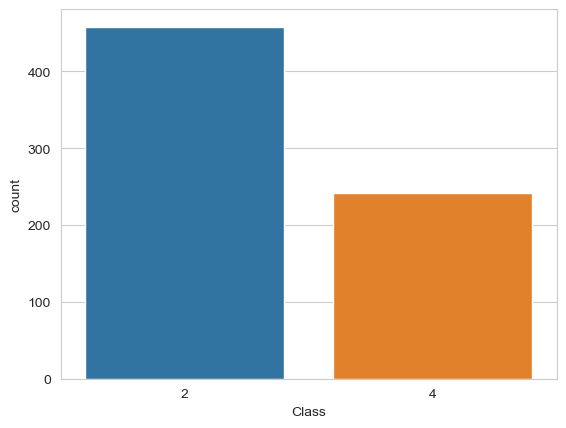

In [50]:
sns.set_style("whitegrid")
sns.countplot(x="Class",data=df)

Clean and prepare data

In [51]:
df.drop("Sample",axis=1,inplace=True)
df.corr()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,Class
F1,1.000000,0.644913,0.654589,0.486356,0.521816,0.587300,0.558428,0.535835,0.350034,0.716001
F2,0.644913,1.000000,0.906882,0.705582,0.751799,0.686801,0.755721,0.722865,0.458693,0.817904
F3,0.654589,0.906882,1.000000,0.683079,0.719668,0.709606,0.735948,0.719446,0.438911,0.818934
F4,0.486356,0.705582,0.683079,1.000000,0.599599,0.665049,0.666715,0.603352,0.417633,0.696800
F5,0.521816,0.751799,0.719668,0.599599,1.000000,0.581261,0.616102,0.628881,0.479101,0.682785
F6,0.587300,0.686801,0.709606,0.665049,0.581261,1.000000,0.675896,0.577362,0.338740,0.816050
F7,0.558428,0.755721,0.735948,0.666715,0.616102,0.675896,1.000000,0.665878,0.344169,0.756616
F8,0.535835,0.722865,0.719446,0.603352,0.628881,0.577362,0.665878,1.000000,0.428336,0.712244
F9,0.350034,0.458693,0.438911,0.417633,0.479101,0.338740,0.344169,0.428336,1.000000,0.423170
Class,0.716001,0.817904,0.818934,0.696800,0.682785,0.816050,0.756616,0.712244,0.423170,1.000000


IV. Displaying the frequency table of “Class” vs. F6

In [52]:
freq_table = pd.crosstab(df['Class'], 'F6')
  
freq_table

col_0,F6
Class,
2,458
4,241


V. Displaying the scatter plot of F1 to F6, one pair at a time

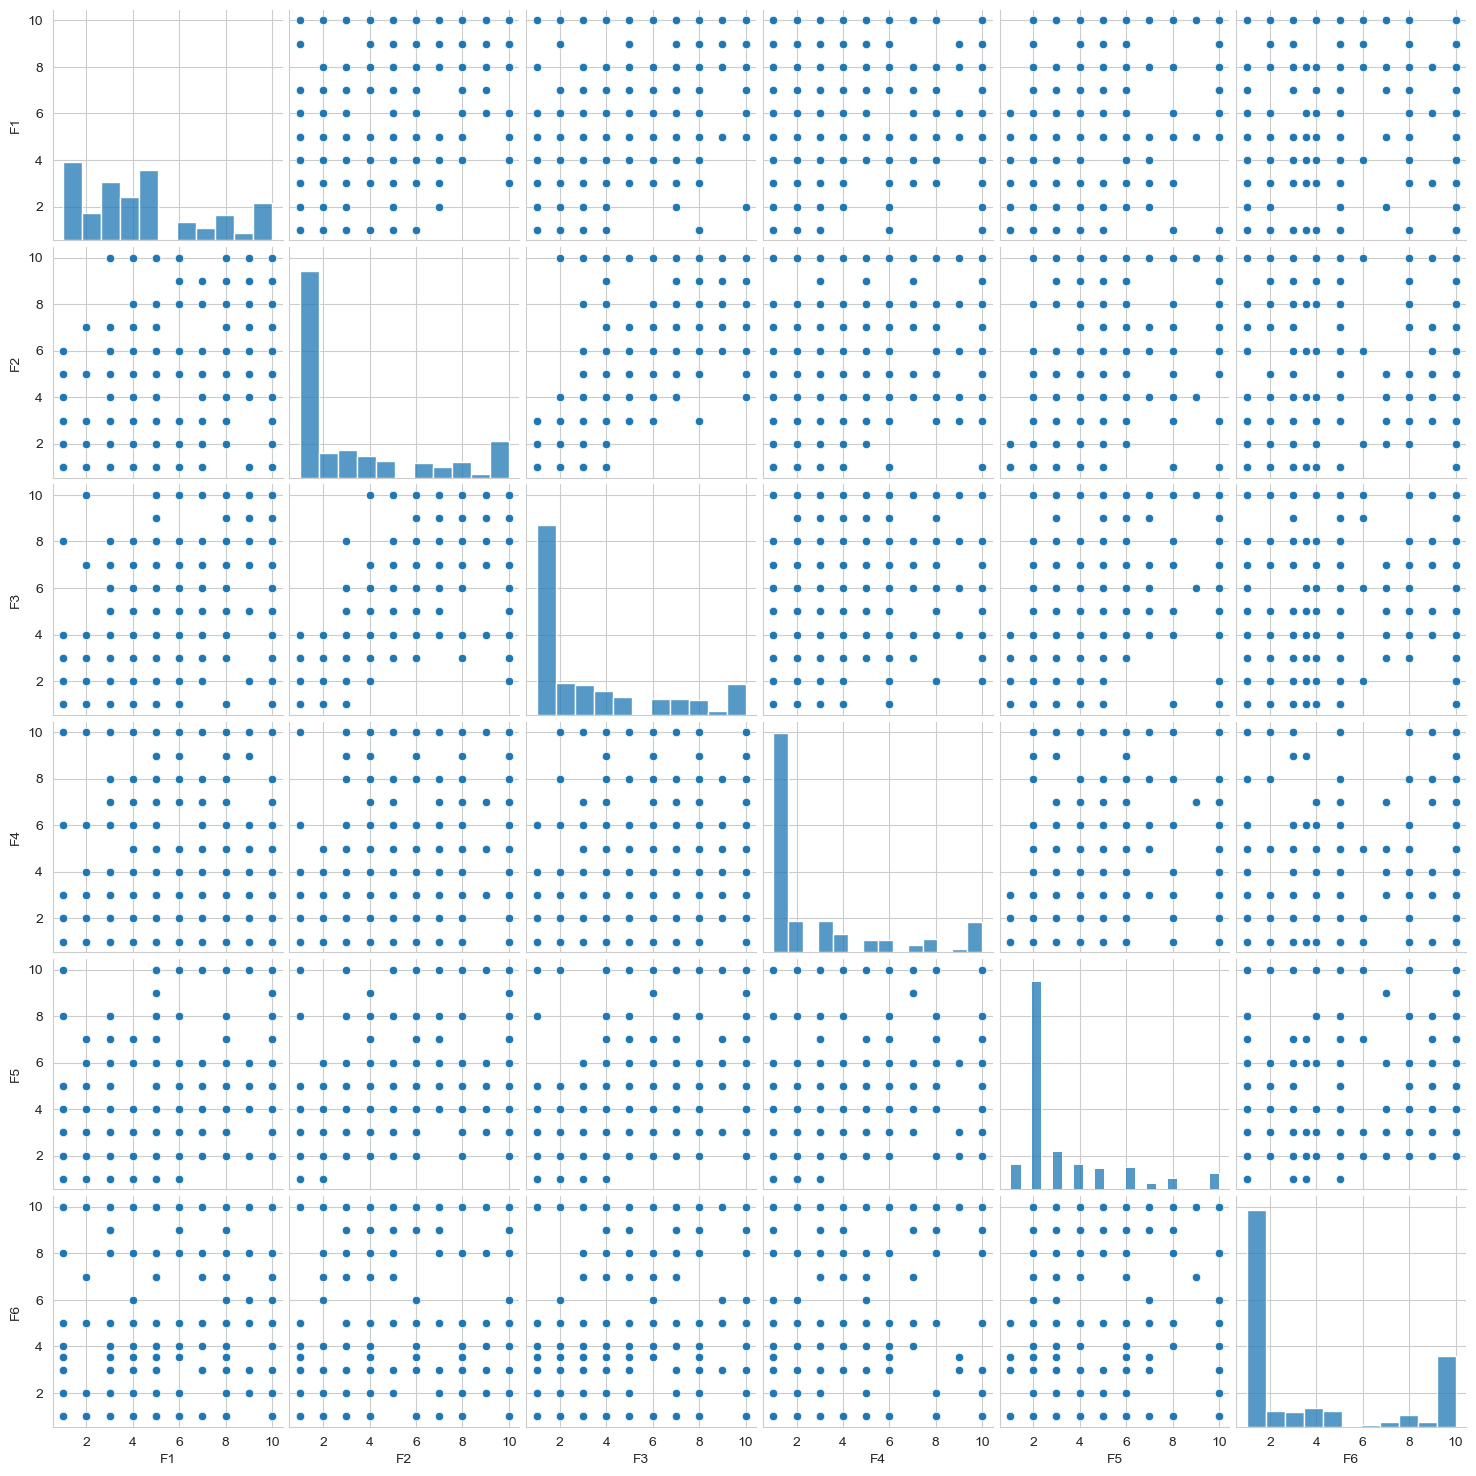

In [53]:
sns.pairplot(df[["F1","F2","F3","F4","F5","F6"]])

VI. Show histogram box plot for columns F7 to F9


<AxesSubplot:>

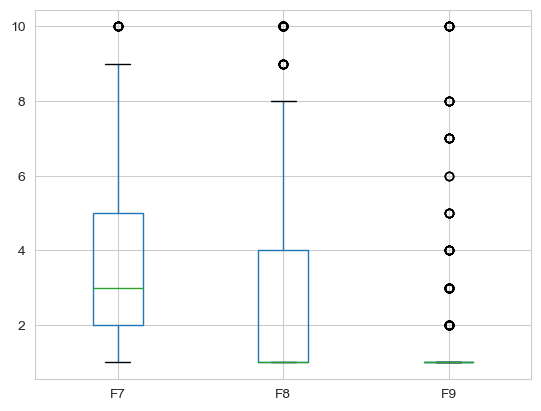

In [54]:
plt.figure()
df.boxplot(["F7","F8","F9"])

2- Delete all the objects from your python- environment. Reload the “breast-cancer-wisconsin.data.csv” from 
canvas into Python. Remove any row with a missing value in any of the columns.

In [55]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [56]:
import pandas as pd
df = pd.read_csv("breast-cancer-wisconsin .csv")
df.dropna()


,Sample,F1,F2,F3,F4,F5,F6,F7,F8,F9,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [ ]:
df.info()

In [ ]:
df.head()

In [59]:
X= df.iloc[:,1:-1].values
y= df.iloc[:,10].values


In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30)

In [61]:
from sklearn.preprocessing import StandardScaler
scalar =StandardScaler()
scaler.fit(X_train)
X_train= scaler.transform(X_train)
X_test= scaler.transform(X_test)

ValueError: could not convert string to float: '?'